# Multivariable least squares regression

### Read in, format and subset data

In [120]:
#Read in data
df = pd.read_csv('crime.csv')

#Rename columns
df.columns = ['city','population','violent_crime','murder_nonegligent_manslaughter','rape_revised','rape_legacy_def','robbery','agg_assault','property_crime','burglary','larceny_theft','motor_theft','arson3','unnamed']

In [121]:
#Preview data
df.head(5)

,city,population,violent_crime,murder_nonegligent_manslaughter,rape_revised,rape_legacy_def,robbery,agg_assault,property_crime,burglary,larceny_theft,motor_theft,arson3,unnamed
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000,nan
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000,nan
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000,nan
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan,nan
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan,nan


In [122]:
#Subset variables of interest: population, murder, robbery and property crime
df2 = df[['population','murder_nonegligent_manslaughter','robbery','property_crime']].copy()

In [123]:
#Evaluate how many null values there are 
df2.isnull().sum()

population                         3
murder_nonegligent_manslaughter    3
robbery                            3
property_crime                     3
dtype: int64

In [134]:
#There aren't that many null values so instead of imputing, we'll just remove them
df2 = df2.dropna()

In [124]:
#Evaluate data types; we need to convert some of the objects to floats
df2.dtypes

population                          object
murder_nonegligent_manslaughter    float64
robbery                             object
property_crime                      object
dtype: object

In [125]:
#Convert objects into floats 
df2['population'] = pd.to_numeric(df2['population'].str.replace(',',''), errors='coerce')
cols = ['population','robbery','property_crime']
df2[cols] = df2[cols].apply(pd.to_numeric, errors='coerce', axis=1)

### Investigate and deal with outliers

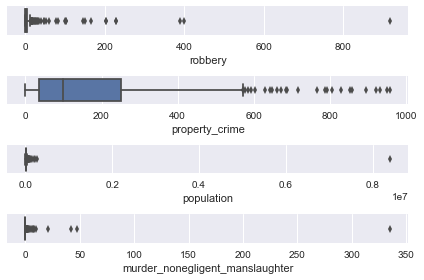

In [126]:
#Evalute distribution of data
fig, axs = plt.subplots(nrows=4)
sns.boxplot(df2['robbery'],ax=axs[0])
sns.boxplot(df2['property_crime'],ax=axs[1])
sns.boxplot(df2['population'],ax=axs[2])
sns.boxplot(df2['murder_nonegligent_manslaughter'],ax=axs[3])
plt.tight_layout()


In [127]:
#There appear to be some pretty outstanding outliers,
#we'll winsorize the data so they don't impair the model's performance 
for column in df2:
    df2[column] = scipy.stats.mstats.winsorize(df2[column],limits=[0.05,0.05])

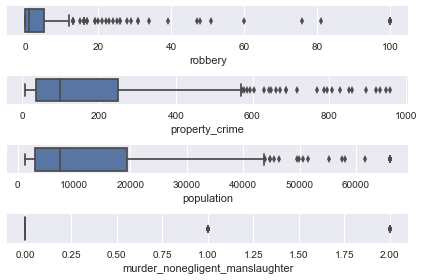

In [128]:
#Revaluate distribution of data after winsorizing
fig, axs = plt.subplots(nrows=4)
sns.boxplot(df2['robbery'],ax=axs[0])
sns.boxplot(df2['property_crime'],ax=axs[1])
sns.boxplot(df2['population'],ax=axs[2])
sns.boxplot(df2['murder_nonegligent_manslaughter'],ax=axs[3])
plt.tight_layout()

### Engineer new features 

In [129]:
#Engineering requisite features

#Population squared
df2['population_squared'] = df2['population']**2

#Whether robbery occurred in the city or not 
df2['robbery_signal'] = np.where((df2['robbery'] > 0),1,0)

#Whether murder occurred in the city or not 
df2['murder_signal'] = np.where((df2['murder_nonegligent_manslaughter'] > 0),1,0)

In [130]:
#Subset target variable and engineered features 
model_df = df2[['population','population_squared','robbery_signal','murder_signal']]